In [1]:
# ignore warning
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

# visualize 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# working with dates
from datetime import datetime

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 

# for tsa 
import statsmodels.api as sm

# holt's linear trend model. 
from statsmodels.tsa.api import Holt

# import prepare function
import prepare

# Wrangle

In [2]:
# Getting data using prepare function
df = prepare.get_data()

In [3]:
df.head()

,year,month,label,all_items_value,all_items_ monthly_change,apparel_value,apparel_monthly_change,energy_value,energy_monthly_change,food_value,food_monthly_change,gas_value,gas_monthly_change,medical_value,medical_monthly_change,transportation_value,transportation_monthly_change
0,1970,01,1957-01-01,27.67,0.1,44.3,0.0,21.3,0.0,28.4,-0.4,NaN,NaN,16.7,0.6,23.5,0.9
1,1970,02,1957-02-01,27.80,0.5,44.3,0.0,21.4,0.5,28.7,1.1,NaN,NaN,16.7,0.0,23.7,0.9
2,1970,03,1957-03-01,27.86,0.2,44.5,0.5,21.5,0.5,28.6,-0.3,NaN,NaN,16.8,0.6,23.7,0.0
3,1970,04,1957-04-01,27.93,0.3,44.4,-0.2,21.6,0.5,28.6,0.0,NaN,NaN,16.9,0.6,23.8,0.4
4,1970,05,1957-05-01,28.00,0.3,44.5,0.2,21.6,0.0,28.7,0.3,NaN,NaN,16.9,0.0,23.9,0.4


In [4]:
# Check the shape of data
df.shape

(787, 17)

In [5]:
# Setting label as index
df = df.set_index('label')

# Split Data

1. We will use the training proportion method to split.    
2. Identify the total length of the dataframe and multiply by `train_prop` to get the number of rows that equates to the first x% of the dataframe, which equates to the first x% of the time covered in the data.   (`x = train_prop * 100`)  
3. Select row indices from 0 up to the index representing x-percentile for train, and from the index representing x-percentile through the end of the dataframe for test. In both of these, we will reset the index in order to return dataframes sorted by datetime.  
4. Return train and test dataframes.  

In [6]:
# set train size to be 50% of total 
train_size = int(round(df.shape[0] * 0.5))
train_size

394

In [7]:
# set validate size to be 30% of total 
validate_size = int(round(df.shape[0] * 0.3))
validate_size

236

In [8]:
# set test size to be number of rows remaining. 
test_size = int(round(df.shape[0] * 0.2))
test_size

157

In [9]:
# Varify length
len(df) == train_size + validate_size + test_size

True

In [10]:
# validate will go from 394 to 394+236
validate_end_index = train_size + validate_size
validate_end_index

630

#### Now, use those values to split our dataframe

In [11]:
# train will go from 0 to 394
train = df[:train_size]

In [12]:
# validate will go from 394 to 630
validate = df[train_size:validate_end_index]

In [13]:
# Checking if tail of train match with validate head
train.tail()

,year,month,all_items_value,all_items_ monthly_change,apparel_value,apparel_monthly_change,energy_value,energy_monthly_change,food_value,food_monthly_change,gas_value,gas_monthly_change,medical_value,medical_monthly_change,transportation_value,transportation_monthly_change
label,,,,,,,,,,,,,,,,
1989-06-01,1970,06,124.1,0.3,118.7,-0.2,96.9,-0.5,125.1,0.3,94.0,-1.9,148.1,0.7,136.0,0.5
1989-07-01,1970,07,124.5,0.3,118.3,-0.3,96.7,-0.2,125.6,0.4,93.2,-0.9,149.2,0.7,136.1,0.1
1989-08-01,1970,08,124.5,0.0,117.1,-1.0,94.9,-1.9,125.9,0.2,89.1,-4.4,150.3,0.7,136.6,0.4
1989-09-01,1970,09,124.8,0.2,118.7,1.4,93.8,-1.2,126.3,0.3,87.0,-2.4,151.4,0.7,137.0,0.3
1989-10-01,1970,10,125.4,0.5,119.6,0.8,94.4,0.6,126.8,0.4,87.8,0.9,152.4,0.7,137.6,0.4


In [14]:
validate.head()

,year,month,all_items_value,all_items_ monthly_change,apparel_value,apparel_monthly_change,energy_value,energy_monthly_change,food_value,food_monthly_change,gas_value,gas_monthly_change,medical_value,medical_monthly_change,transportation_value,transportation_monthly_change
label,,,,,,,,,,,,,,,,
1989-11-01,1970,11,125.9,0.4,120.0,0.3,93.9,-0.5,127.4,0.5,86.1,-1.9,153.7,0.9,137.6,0.0
1989-12-01,1970,12,126.3,0.3,119.8,-0.2,94.2,0.3,127.8,0.3,86.0,-0.1,154.6,0.6,138.1,0.4
1990-01-01,1970,01,127.5,1.0,119.9,0.1,98.9,5.0,129.7,1.5,92.9,8.0,155.7,0.7,139.2,0.8
1990-02-01,1970,02,128.0,0.4,122.0,1.8,98.2,-0.7,130.8,0.8,93.0,0.1,156.7,0.6,140.1,0.6
1990-03-01,1970,03,128.6,0.5,123.8,1.5,97.6,-0.6,131.0,0.2,92.3,-0.8,158.0,0.8,141.1,0.7


In [15]:
# Checking if tail of validate match with test head
validate.tail()

,year,month,all_items_value,all_items_ monthly_change,apparel_value,apparel_monthly_change,energy_value,energy_monthly_change,food_value,food_monthly_change,gas_value,gas_monthly_change,medical_value,medical_monthly_change,transportation_value,transportation_monthly_change
label,,,,,,,,,,,,,,,,
2009-02-01,1970,02,212.705,0.4,119.888,1.6,183.721,2.8,218.949,-0.1,174.067,8.2,392.266,0.2,248.703,0.4
2009-03-01,1970,03,212.495,-0.1,120.368,0.4,178.415,-2.9,218.510,-0.2,166.814,-4.2,393.285,0.3,248.454,-0.1
2009-04-01,1970,04,212.709,0.1,120.182,-0.2,177.552,-0.5,218.175,-0.2,168.312,0.9,394.700,0.4,249.081,0.3
2009-05-01,1970,05,213.022,0.1,120.038,-0.1,179.830,1.3,217.813,-0.2,177.057,5.2,395.999,0.3,248.895,-0.1
2009-06-01,1970,06,214.790,0.8,120.276,0.2,197.033,9.6,217.813,0.0,213.086,20.3,396.799,0.2,248.503,-0.2


In [16]:
# test will include 631 to the end
test = df[validate_end_index:]

In [17]:
test.head()

,year,month,all_items_value,all_items_ monthly_change,apparel_value,apparel_monthly_change,energy_value,energy_monthly_change,food_value,food_monthly_change,gas_value,gas_monthly_change,medical_value,medical_monthly_change,transportation_value,transportation_monthly_change
label,,,,,,,,,,,,,,,,
2009-07-01,1970,07,214.726,0.0,119.984,-0.2,195.778,-0.6,217.387,-0.2,211.649,-0.7,398.036,0.3,250.113,0.6
2009-08-01,1970,08,215.445,0.3,120.236,0.2,201.583,3.0,217.376,0.0,223.781,5.7,398.919,0.2,251.503,0.6
2009-09-01,1970,09,215.861,0.2,120.779,0.5,202.777,0.6,217.258,-0.1,226.214,1.1,399.902,0.2,253.010,0.6
2009-10-01,1970,10,216.509,0.3,120.500,-0.2,204.719,1.0,217.452,0.1,228.651,1.1,400.792,0.2,254.501,0.6
2009-11-01,1970,11,217.234,0.3,120.007,-0.4,210.932,3.0,217.581,0.1,238.246,4.2,402.295,0.4,255.701,0.5


In [18]:
# Checking shape again
train.shape[0], validate.shape[0], test.shape[0]

(394, 236, 157)

<AxesSubplot:xlabel='label', ylabel='all_items_value'>

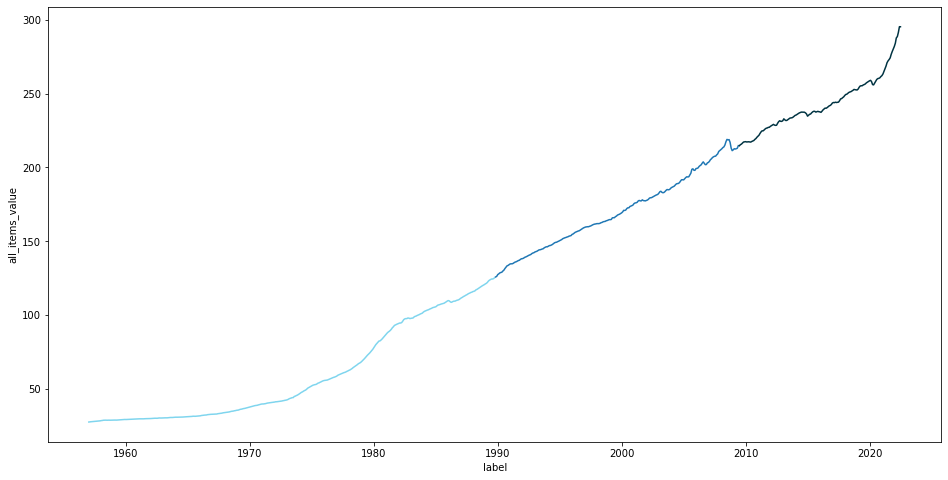

In [19]:
# Visualizing how data is split through time
plt.figure(figsize = (16,8))
sns.lineplot(train.index, train.all_items_value, color = '#7FD5EE')
sns.lineplot(validate.index, validate.all_items_value)
sns.lineplot(test.index, test.all_items_value, color = '#003342')

***

# Exploratory Data Analysis (EDA)

In [20]:
train.head()

,year,month,all_items_value,all_items_ monthly_change,apparel_value,apparel_monthly_change,energy_value,energy_monthly_change,food_value,food_monthly_change,gas_value,gas_monthly_change,medical_value,medical_monthly_change,transportation_value,transportation_monthly_change
label,,,,,,,,,,,,,,,,
1957-01-01,1970,01,27.67,0.1,44.3,0.0,21.3,0.0,28.4,-0.4,NaN,NaN,16.7,0.6,23.5,0.9
1957-02-01,1970,02,27.80,0.5,44.3,0.0,21.4,0.5,28.7,1.1,NaN,NaN,16.7,0.0,23.7,0.9
1957-03-01,1970,03,27.86,0.2,44.5,0.5,21.5,0.5,28.6,-0.3,NaN,NaN,16.8,0.6,23.7,0.0
1957-04-01,1970,04,27.93,0.3,44.4,-0.2,21.6,0.5,28.6,0.0,NaN,NaN,16.9,0.6,23.8,0.4
1957-05-01,1970,05,28.00,0.3,44.5,0.2,21.6,0.0,28.7,0.3,NaN,NaN,16.9,0.0,23.9,0.4


### All Category Price Trend

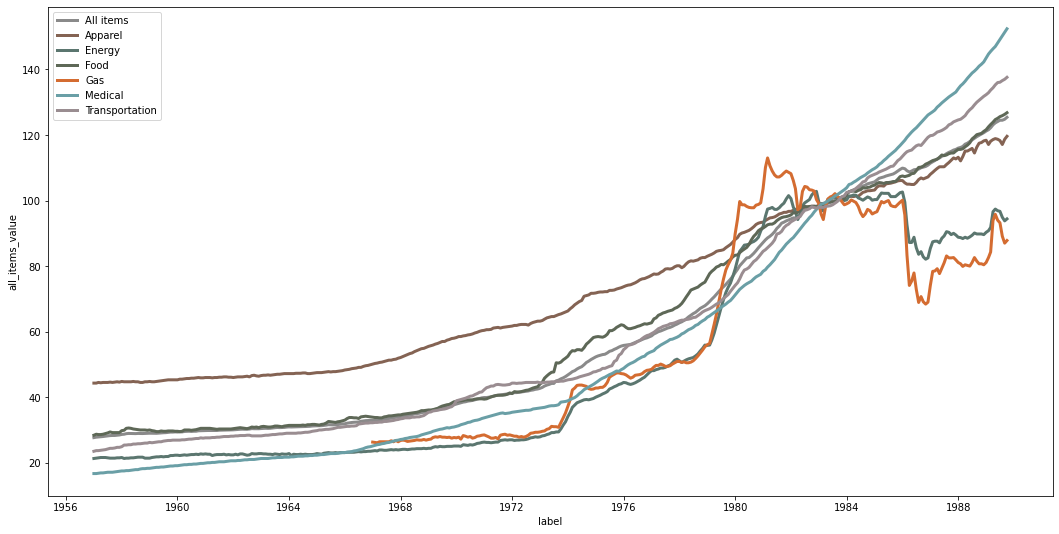

In [21]:
# Visualizing value over time
plt.figure(figsize = (18,9))
sns.lineplot(x=train.index, y=train.all_items_value, label = 'All items', linewidth = 3, color = '#8a8a8a')
sns.lineplot(x=train.index, y=train.apparel_value, label ='Apparel', linewidth = 3, color = '#846353')
sns.lineplot(x=train.index, y=train.energy_value, label = 'Energy', linewidth = 3, color = '#5b766f')
sns.lineplot(x=train.index, y=train.food_value, label = 'Food', linewidth = 3, color = '#5e6857')
sns.lineplot(x=train.index, y=train.gas_value, label = 'Gas', linewidth = 3, color = '#d46c31')
sns.lineplot(x=train.index, y=train.medical_value, label = 'Medical', linewidth = 3, color = '#6a9fa6')
sns.lineplot(x=train.index, y=train.transportation_value, label = 'Transportation', linewidth = 3, color = '#9a8d91')

plt.legend()

### Aggregating by Month

**Al Items**

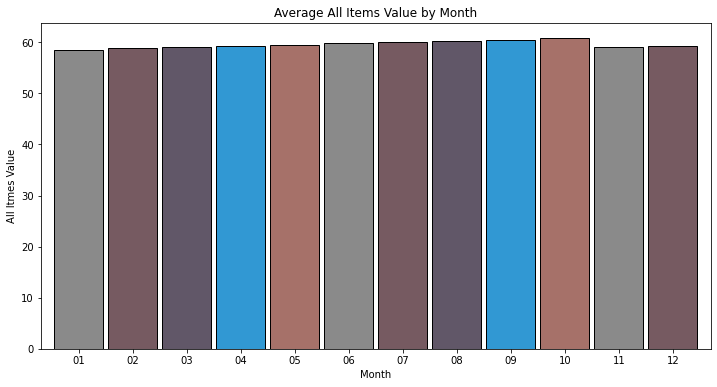

In [22]:
plt.figure(figsize = (12,6))
ax = train.groupby(train.month).all_items_value.mean().plot.bar(width=.9, ec='black', color = ['#8a8a8a', '#765a61', '#615768', '#3198d3', '#a67169'])
plt.xticks(rotation=0)
ax.set(title='Average All Items Value by Month', xlabel='Month', ylabel='All Itmes Value')
plt.show()

**Apparel**

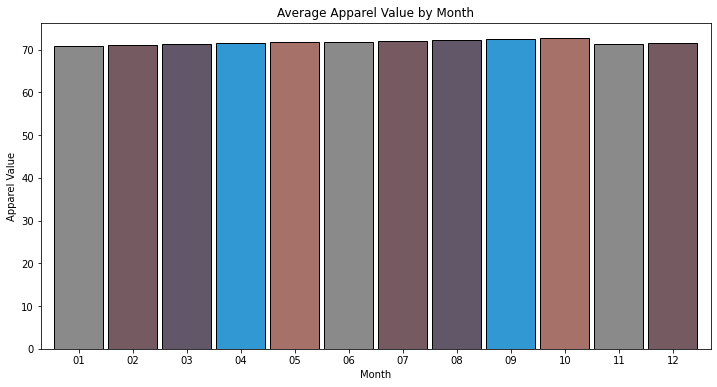

In [23]:
plt.figure(figsize = (12,6))
ax = train.groupby(train.month).apparel_value.mean().plot.bar(width=.9, ec='black', color = ['#8a8a8a', '#765a61', '#615768', '#3198d3', '#a67169'])
plt.xticks(rotation=0)
ax.set(title='Average Apparel Value by Month', xlabel='Month', ylabel='Apparel Value')
plt.show()

**Energy**

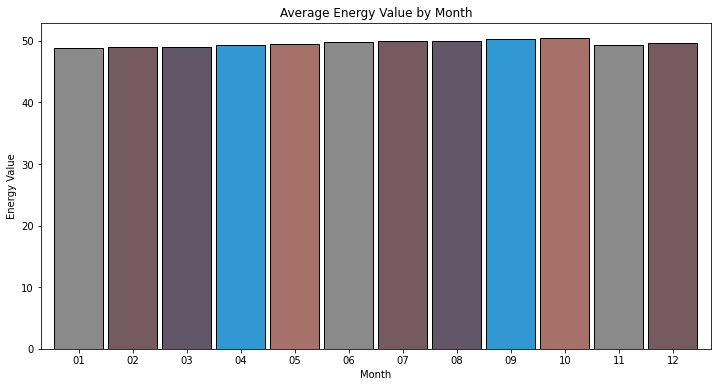

In [24]:
plt.figure(figsize = (12,6))
ax = train.groupby(train.month).energy_value.mean().plot.bar(width=.9, ec='black', color = ['#8a8a8a', '#765a61', '#615768', '#3198d3', '#a67169'])
plt.xticks(rotation=0)
ax.set(title='Average Energy Value by Month', xlabel='Month', ylabel='Energy Value')
plt.show()

**Food**

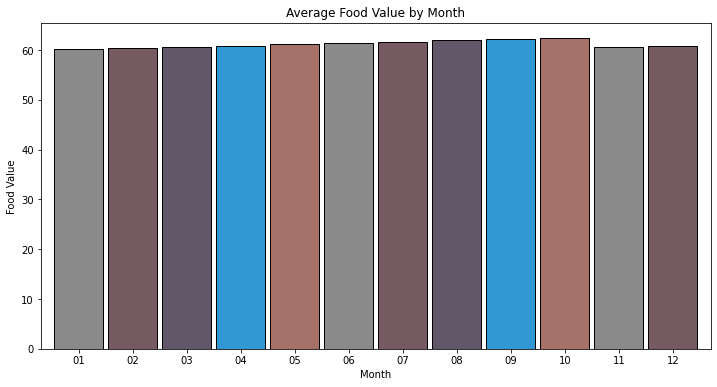

In [25]:
plt.figure(figsize = (12,6))
ax = train.groupby(train.month).food_value.mean().plot.bar(width=.9, ec='black', color = ['#8a8a8a', '#765a61', '#615768', '#3198d3', '#a67169'])
plt.xticks(rotation=0)
ax.set(title='Average Food Value by Month', xlabel='Month', ylabel='Food Value')
plt.show()

**Gasoline**

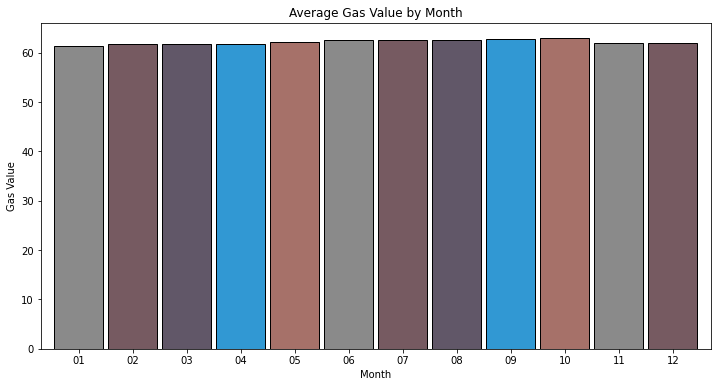

In [26]:
plt.figure(figsize = (12,6))
ax = train.groupby(train.month).gas_value.mean().plot.bar(width=.9, ec='black', color = ['#8a8a8a', '#765a61', '#615768', '#3198d3', '#a67169'])
plt.xticks(rotation=0)
ax.set(title='Average Gas Value by Month', xlabel='Month', ylabel='Gas Value')
plt.show()

**Medical**

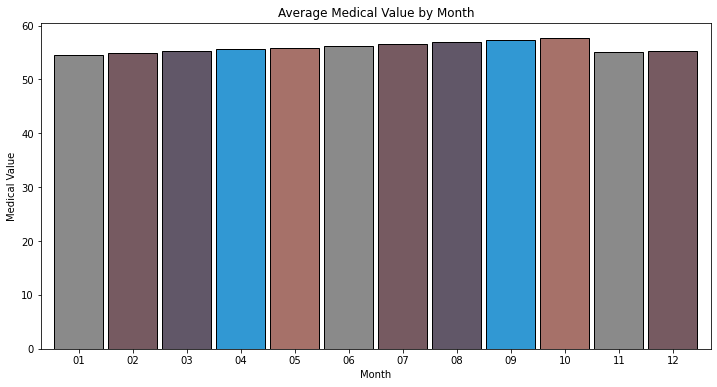

In [27]:
plt.figure(figsize = (12,6))
ax = train.groupby(train.month).medical_value.mean().plot.bar(width=.9, ec='black', color = ['#8a8a8a', '#765a61', '#615768', '#3198d3', '#a67169'])
plt.xticks(rotation=0)
ax.set(title='Average Medical Value by Month', xlabel='Month', ylabel='Medical Value')
plt.show()

**Transportation**

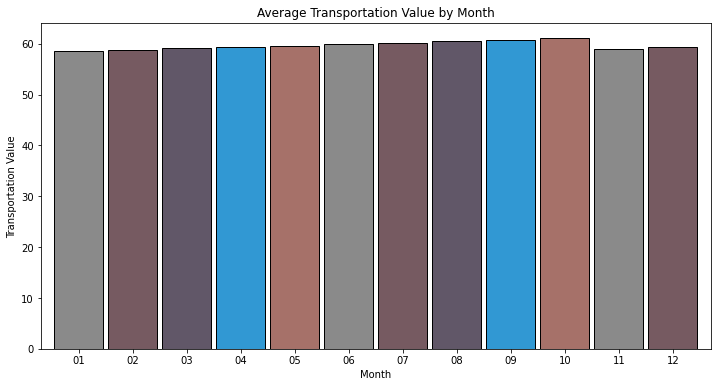

In [28]:
plt.figure(figsize = (12,6))
ax = train.groupby(train.month).transportation_value.mean().plot.bar(width=.9, ec='black', color = ['#8a8a8a', '#765a61', '#615768', '#3198d3', '#a67169'])
plt.xticks(rotation=0)
ax.set(title='Average Transportation Value by Month', xlabel='Month', ylabel='Transportation Value')
plt.show()

<h3><div class="alert alert-info">We don't see significant difference per month. But values gradually increase from January to October (peek), and dip down in November.</div></h3>

***

Before we try out different methods for forecasting sales and number of items sold, let's create a couple of functions that will be helpful in evaluating each of the methods that follow. 

`evaluate()` will compute the Mean Squared Error and the Rood Mean Squared Error to evaluate.  

In [29]:
def evaluate(target_var):
    '''
    This function will take the actual values of the target_var from validate, 
    and the predicted values stored in yhat_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

`plot_and_eval()` will use the evaluate function and also plot train and test values with the predicted values in order to compare performance. 

In [30]:
def plot_and_eval(target_var):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df. 
    it will als lable the rmse. 
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label='Train', linewidth=3, color = '#6a9fa6')
    plt.plot(validate[target_var], label='Validate', linewidth=3, color = '#5b766f')
    plt.plot(yhat_df[target_var], label = 'Prediction', linewidth = 3, color = '#d46c31')
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

Write `append_eval_df(model_type)` to append evaluation metrics for each model type, target variable, and metric type, along with the metric value into our `eval_df` data frame object. Which we will create an empty `eval_df` dataframe object to start. 

In [31]:
# create an empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
eval_df

,model_type,target_var,rmse


In [32]:
# function to store the rmse so that we can compare
def append_eval_df(model_type, target_var):
    '''
    this function takes in as arguments the type of model run, and the name of the target variable. 
    It returns the eval_df with the rmse appended to it for that model and target_var. 
    '''
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var],
        'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

# Forecast 

Forecasting is another word for predicting time series data. 

1. Last Observed Value: The future will look like the now
2. Simple Average: The future will look, on average, like history. 
3. Moving Average: The future will look, on average, like recent history. 
4. Holt's Linear Trend
5. Previous Cycle


### Last observed value

The simplest method for forecasting is to predict all future values to be the last observed value.  

**Make Predictions**

`all_items_value`

In [33]:
train['all_items_value'][-1:][0]

125.4

In [34]:
# take the last item of all item value and assign to variable
last_value = train['all_items_value'][-1:][0]
last_value

125.4

In [35]:
yhat_df = pd.DataFrame(
    {'all_items_value': [last_value]},
    index=validate.index)

yhat_df.head()

,all_items_value
label,
1989-11-01,125.4
1989-12-01,125.4
1990-01-01,125.4
1990-02-01,125.4
1990-03-01,125.4


**Note**: every predicted value in yhat_df is the same.

**Plot Actual vs. Predicted Values**

Now, let's plot actual and predicted values

all_items_value -- RMSE: 51


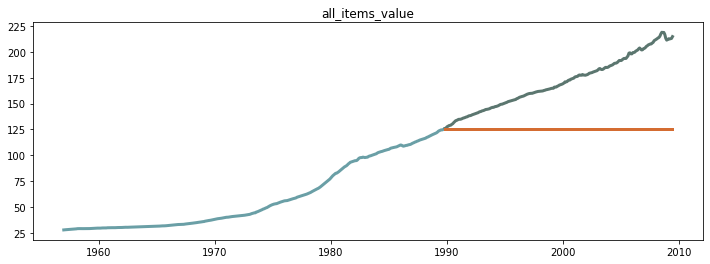

In [36]:
plot_and_eval('all_items_value')

**Evaluate** 

Evaluate using MSE and RMSE, and add evaluation metrics to `eval_df`

In [37]:
eval_df = append_eval_df(model_type = 'last_observed_value', 
                             target_var = 'all_items_value')

eval_df

,model_type,target_var,rmse
0,last_observed_value,all_items_value,51.0


### Simple Average

Take the simple average of historical values and use that value to predict future values.   

This is a good option for an initial baseline. Every future datapoint (those in 'test') will be assigned the same value, and that value will be the overall mean of the values in train. 

**Make Predictions**

Establishing the value of the prediction we will make.

In [38]:
# compute simple average
avg_value = round(train['all_items_value'].mean(), 2)
avg_value

59.57

Apply predictions to our observations.

In [39]:
def make_predictions(all_items_value=None):
    yhat_df = pd.DataFrame({'all_items_value': [all_items_value]},
                          index=validate.index)
    return yhat_df

In [40]:
yhat_df = make_predictions(avg_value)

In [41]:
yhat_df.describe()

,all_items_value
count,2.360000e+02
mean,5.957000e+01
std,1.851338e-13
min,5.957000e+01
25%,5.957000e+01
50%,5.957000e+01
75%,5.957000e+01
max,5.957000e+01


**Plot Actual vs. Predicted Values**

Now, let's plot and evaluate the performance of our time series model using **Simple Average**

all_items_value -- RMSE: 113


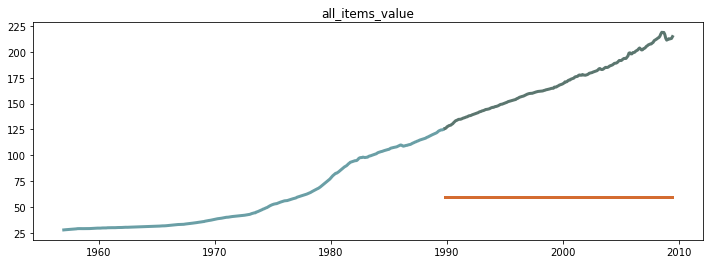

In [42]:
plot_and_eval('all_items_value')

**Evaluate**

Evaluate using MSE and RMSE, and add evaluation metrics to `eval_df`

In [43]:
eval_df = append_eval_df(model_type='simple_average', 
                            target_var = 'all_items_value')
eval_df

,model_type,target_var,rmse
0,last_observed_value,all_items_value,51.0
1,simple_average,all_items_value,113.0


### Moving Average

In this example, we will use a 30-day moving average to forecast. In other words, the average over the last 30-days will be used as the forecasted value. 

In [44]:
# demonstrate that the mean of the first 30 days 
# is equal to rolling(30) on day 30

print(train['all_items_value'].rolling(30).mean())

label
1957-01-01           NaN
1957-02-01           NaN
1957-03-01           NaN
1957-04-01           NaN
1957-05-01           NaN
                 ...    
1989-06-01    117.286667
1989-07-01    117.723333
1989-08-01    118.146667
1989-09-01    118.566667
1989-10-01    118.990000
Name: all_items_value, Length: 394, dtype: float64


**Make Predictions**

In [45]:
period=30
train['all_items_value'].rolling(period).mean()[-1]

118.99000000000001

In [46]:
period = 30 

# take 30 day rolling average, then take the last element and that will the one that propogates 
# forward as our prediction. 
rolling_value = round(train['all_items_value'].rolling(period).mean()[-1], 2)
print(rolling_value)

118.99


In [47]:
yhat_df = make_predictions(rolling_value)
yhat_df.head()

,all_items_value
label,
1989-11-01,118.99
1989-12-01,118.99
1990-01-01,118.99
1990-02-01,118.99
1990-03-01,118.99


**Plot Actual vs. Predicted Values**

Now, let's plot and evaluate the performance of our time series model using **Moving Average**

all_items_value -- RMSE: 57


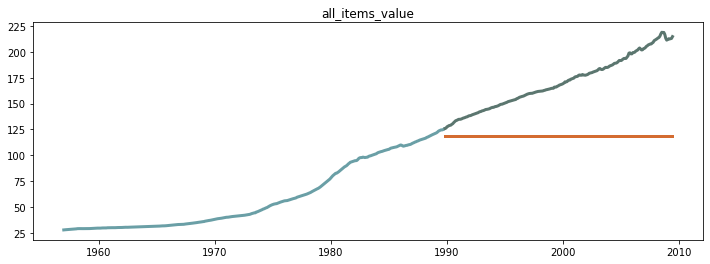

In [48]:
plot_and_eval('all_items_value')

**Evaluate**

Evaluate using MSE and RMSE, and add evaluation metrics to `eval_df`

In [49]:
eval_df = append_eval_df(model_type = '30d_moving_avg', 
                            target_var = 'all_items_value')
eval_df

,model_type,target_var,rmse
0,last_observed_value,all_items_value,51.0
1,simple_average,all_items_value,113.0
2,30d_moving_avg,all_items_value,57.0


Let's try out several other values for periods:

In [51]:
periods = [4, 12, 26, 52, 104]

for p in periods: 
    rolling_value = round(train['all_items_value'].rolling(p).mean()[-1], 2)
    yhat_df = make_predictions(rolling_value)
    model_type = str(p) + '_day_moving_avg'
    eval_df = append_eval_df(model_type = model_type,
                                target_var = 'all_items_value')

In [52]:
eval_df

,model_type,target_var,rmse
0,last_observed_value,all_items_value,51.0
1,simple_average,all_items_value,113.0
2,30d_moving_avg,all_items_value,57.0
3,4_day_moving_avg,all_items_value,52.0
4,12_day_moving_avg,all_items_value,53.0
5,26_day_moving_avg,all_items_value,56.0
6,52_day_moving_avg,all_items_value,61.0
7,104_day_moving_avg,all_items_value,68.0


4 day moving average is the best so far.

In [54]:
min_items_rmse = eval_df[eval_df.target_var == 'all_items_value']['rmse'].min()

In [55]:
min_items_rmse

51.0

In [57]:
# Find the model with the lowest rmse
eval_df[eval_df.rmse == min_items_rmse]

,model_type,target_var,rmse
0,last_observed_value,all_items_value,51.0


### Basic Holt's Linear Trend

**Make Predictions**

Now, like we would when using sklearn, we will create the Holt object, fit the model, and make predictions. 

Holt: 

- exponential = True/False (exponential vs. linear growth, additive vs. multiplicative)
- damped $\phi$ = True/False: with Holt, forecasts will increase or decrease indefinitely into the future.  To avoid this, use the Damped trend method which has a damping parameter 0< ϕ <1. 


fit: 

- smoothing_level ($\alpha$): value between (0,1)
- smoothing_slope ($\beta$): value between (0,1)
- optimized: use the auto-optimization that allow statsmodels to automatically find an optimized value for us. 

In [58]:
import statsmodels.api as sm

In [63]:
col = 'all_items_value' 
# create our Holt's Object
model = Holt(train[col], exponential=False, damped=True)

In [64]:
# fit the holt's object
model = model.fit(optimized=True)

In [65]:
yhat_items = model.predict(start = validate.index[0],
                              end = validate.index[-1])

In [66]:
validate.shape

(236, 16)

In [67]:
yhat_items

1989-11-01    125.804479
1989-12-01    126.201098
1990-01-01    126.590008
1990-02-01    126.971361
1990-03-01    127.345302
                 ...    
2009-02-01    145.993725
2009-03-01    145.997986
2009-04-01    146.002165
2009-05-01    146.006262
2009-06-01    146.010279
Freq: MS, Length: 236, dtype: float64

In [68]:
model = Holt(train[col], exponential=False, damped=True)
model = model.fit(optimized=True)
yhat_items = model.predict(start = validate.index[0],
                              end = validate.index[-1])
yhat_df[col] = round(yhat_items, 2)

In [69]:
yhat_df

,all_items_value
label,
1989-11-01,125.80
1989-12-01,126.20
1990-01-01,126.59
1990-02-01,126.97
1990-03-01,127.35
...,...
2009-02-01,145.99
2009-03-01,146.00
2009-04-01,146.00


**Plot Actual vs. Predicted Values**

all_items_value -- RMSE: 35


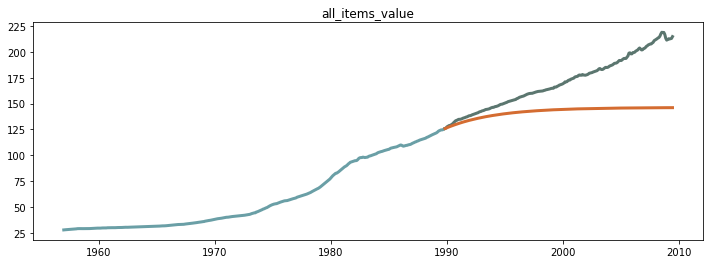

In [70]:
plot_and_eval(target_var = col)

**Evaluate**

In [71]:
eval_df = append_eval_df(model_type = 'holts_optimized', 
                            target_var = col)

In [72]:
eval_df.sort_values(by='rmse')

,model_type,target_var,rmse
8,holts_optimized,all_items_value,35.0
0,last_observed_value,all_items_value,51.0
3,4_day_moving_avg,all_items_value,52.0
4,12_day_moving_avg,all_items_value,53.0
5,26_day_moving_avg,all_items_value,56.0
2,30d_moving_avg,all_items_value,57.0
6,52_day_moving_avg,all_items_value,61.0
7,104_day_moving_avg,all_items_value,68.0
1,simple_average,all_items_value,113.0


**Holt's optimized model has the lowest RMSE of 35.0**

# Conclusion

Which model did the best? 

In [75]:
eval_df

,model_type,target_var,rmse
0,last_observed_value,all_items_value,51.0
1,simple_average,all_items_value,113.0
2,30d_moving_avg,all_items_value,57.0
3,4_day_moving_avg,all_items_value,52.0
4,12_day_moving_avg,all_items_value,53.0
5,26_day_moving_avg,all_items_value,56.0
6,52_day_moving_avg,all_items_value,61.0
7,104_day_moving_avg,all_items_value,68.0
8,holts_optimized,all_items_value,35.0


In [76]:
min_rmse = eval_df.groupby('target_var')['rmse'].min()[0]
# find which model that is
eval_df[(eval_df.rmse == min_rmse)]

,model_type,target_var,rmse
8,holts_optimized,all_items_value,35.0


Let's test it out on our out-of-sample data

We will be using train + validate to predict test. 

In [103]:
col = 'all_items_value' 
model = Holt(train[col], exponential=False, damped=True)
model = model.fit(optimized=True)
yhat_items = model.predict(start = test.index[0],
                              end = test.index[-1])
final_yhat = pd.DataFrame(round(yhat_items, 2), columns = ['all_items_value'])

In [104]:
final_yhat

,all_items_value
2009-07-01,146.01
2009-08-01,146.02
2009-09-01,146.02
2009-10-01,146.03
2009-11-01,146.03
...,...
2022-03-01,146.20
2022-04-01,146.20
2022-05-01,146.20
2022-06-01,146.20


In [105]:
rmse = round(sqrt(mean_squared_error(test[col], final_yhat[col])), 0)
rmse

98.0